In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
import time
from datetime import date
import statsmodels.api as sm

import openpyxl
from openpyxl import load_workbook

start = datetime.datetime (1950, 1, 1)

df = pdr.DataReader(['USREC','TB3MS','GS10','IC4WSA','UNRATE','UMCSENT','CONSUMER','PI','REALLN','AWHNONAG','AWHI','HTRUCKSSAAR','PERMIT1','HSN1F'], 'fred', start).resample("MS").first()
df.tail()

,USREC,TB3MS,GS10,IC4WSA,UNRATE,UMCSENT,CONSUMER,PI,REALLN,AWHNONAG,AWHI,HTRUCKSSAAR,PERMIT1,HSN1F
DATE,,,,,,,,,,,,,,
2023-08-01,0.0,5.30,4.17,231500.0,3.8,69.4,1895.1171,23089.1,5482.4762,33.8,122.5,0.544,948.0,662.0
2023-09-01,0.0,5.32,4.38,229500.0,3.8,67.9,1902.0658,23185.9,5495.7024,33.8,122.7,0.501,963.0,719.0
2023-10-01,0.0,5.34,4.80,206750.0,3.9,63.8,1902.4276,23242.9,5497.9925,33.7,122.4,0.475,969.0,679.0
2023-11-01,0.0,5.27,4.50,212500.0,3.7,NaN,NaN,NaN,NaN,33.8,122.9,0.540,NaN,NaN
2023-12-01,NaN,NaN,NaN,220750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Note; whenever you see a directory to Philip's file, you will need to change it to yours

### Data Management

##### Note; remember to manually add last value for following series, since the FRED API only releases the series up to t-1! 
- "Index of Consumer Sentiment" (umcsent_last); http://www.sca.isr.umich.edu/
- "Consumer Loans" - Table 3 - Week ending (consumer_last); https://www.federalreserve.gov/releases/h8/current/
- "Real Estate Loans" - Table 2 - Week ending (restate_last); https://www.federalreserve.gov/releases/h8/current/

In [2]:
#Only use this if last value is niot t-1
df = df.iloc[:-1]
df

,USREC,TB3MS,GS10,IC4WSA,UNRATE,UMCSENT,CONSUMER,PI,REALLN,AWHNONAG,AWHI,HTRUCKSSAAR,PERMIT1,HSN1F
DATE,,,,,,,,,,,,,,
1950-01-01,0.0,1.07,NaN,NaN,6.5,NaN,8.1905,NaN,10.8820,NaN,NaN,NaN,NaN,NaN
1950-02-01,0.0,1.12,NaN,NaN,6.4,NaN,8.3569,NaN,11.0301,NaN,NaN,NaN,NaN,NaN
1950-03-01,0.0,1.12,NaN,NaN,6.3,NaN,8.5232,NaN,11.1819,NaN,NaN,NaN,NaN,NaN
1950-04-01,0.0,1.15,NaN,NaN,5.8,NaN,8.6946,NaN,11.3294,NaN,NaN,NaN,NaN,NaN
1950-05-01,0.0,1.16,NaN,NaN,5.5,NaN,8.8647,NaN,11.4721,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,0.0,5.25,3.90,253500.0,3.5,71.5,1885.3108,22984.0,5455.8678,33.8,122.5,0.504,930.0,728.0
2023-08-01,0.0,5.30,4.17,231500.0,3.8,69.4,1895.1171,23089.1,5482.4762,33.8,122.5,0.544,948.0,662.0
2023-09-01,0.0,5.32,4.38,229500.0,3.8,67.9,1902.0658,23185.9,5495.7024,33.8,122.7,0.501,963.0,719.0


In [3]:
#df['UNRATE'].iloc[-1] = 4.2

umcsent_last = 63.8
df['UMCSENT'].iloc[-1] = umcsent_last

consumer_last = 1911.4
df['CONSUMER'].iloc[-1] = consumer_last

restate_last = 5501.9
df['REALLN'].iloc[-1] = restate_last
df.tail(10)

,USREC,TB3MS,GS10,IC4WSA,UNRATE,UMCSENT,CONSUMER,PI,REALLN,AWHNONAG,AWHI,HTRUCKSSAAR,PERMIT1,HSN1F
DATE,,,,,,,,,,,,,,
2023-02-01,0.0,4.65,3.75,203250.0,3.6,66.9,1856.3038,22648.4,5403.9263,33.9,122.0,0.504,796.0,625.0
2023-03-01,0.0,4.69,3.66,224750.0,3.5,62.0,1867.7698,22757.9,5413.5114,33.9,122.2,0.509,829.0,640.0
2023-04-01,0.0,4.92,3.46,237750.0,3.4,63.7,1876.6504,22806.1,5421.1316,33.8,122.0,0.532,856.0,679.0
2023-05-01,0.0,5.14,3.57,237000.0,3.7,59.0,1886.1076,22876.6,5448.7047,33.8,122.2,0.565,902.0,710.0
2023-06-01,0.0,5.16,3.75,237500.0,3.6,64.2,1890.1704,22921.4,5442.8245,33.8,122.3,0.548,924.0,683.0
2023-07-01,0.0,5.25,3.90,253500.0,3.5,71.5,1885.3108,22984.0,5455.8678,33.8,122.5,0.504,930.0,728.0
2023-08-01,0.0,5.30,4.17,231500.0,3.8,69.4,1895.1171,23089.1,5482.4762,33.8,122.5,0.544,948.0,662.0
2023-09-01,0.0,5.32,4.38,229500.0,3.8,67.9,1902.0658,23185.9,5495.7024,33.8,122.7,0.501,963.0,719.0
2023-10-01,0.0,5.34,4.80,206750.0,3.9,63.8,1902.4276,23242.9,5497.9925,33.7,122.4,0.475,969.0,679.0


<AxesSubplot:xlabel='DATE'>

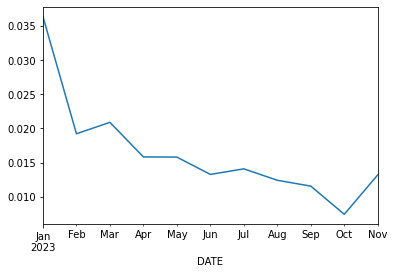

In [4]:
df['AWHI'].pct_change(12).loc['2023'].plot()

#### Note; using the three months moving average to obtain an estimated last value for "personal income"

In [5]:
pix = df['PI'].to_frame().iloc[:,0].rolling(window=3).mean().shift()
df['PI'].iloc[-2:] = pix.iloc[-2:]

In [ ]:
df[['AWHI','HTRUCKSSAAR','PERMIT1','HSN1F']] = df[['AWHI','HTRUCKSSAAR','PERMIT1','HSN1F']].shift(1)

dx = df[:-5]
dy = df[-5:]

dy = dy.dropna(subset=['UNRATE','UMCSENT'])
df = dx.append(dy)

dmx = pd.read_excel("F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx", 'Monthly').set_index('Date')

starta = dmx.index[-1]
dates = pd.date_range(starta, periods=2, freq='MS')
dfa = pd.DataFrame(df, index=dates)
dfa[['AWHI','HTRUCKSSAAR','PERMIT1','HSN1F']] = dfa[['AWHI','HTRUCKSSAAR','PERMIT1','HSN1F']].shift(-1, axis=0)

dfa['USREC'].iloc[-2] = dmx['USREC'].iloc[-1]
dfa['TB3MS'].iloc[-2] = dmx['TB3MS'].iloc[-1]
dfa['GS10'].iloc[-2] = dmx['GS10'].iloc[-1]
dfa['IC4WSA'].iloc[-2] = dmx['IC4WSA'].iloc[-1]
dfa['UNRATE'].iloc[-2] = dmx['UNRATE'].iloc[-1]
dfa['UMCSENT'].iloc[-2] = dmx['UMCSENT'].iloc[-1]
dfa['CONSUMER'].iloc[-2] = dmx['CONSUMER'].iloc[-1]
dfa['PI'].iloc[-2] = dmx['PI'].iloc[-1]
dfa['REALLN'].iloc[-2] = dmx['REALLN'].iloc[-1]
dfa['AWHNONAG'].iloc[-2] = dmx['AWHNONAG'].iloc[-1]

dma = dmx.iloc[:-1].append(dfa, ignore_index = False)

df = dma
df = df[~df['UNRATE'].isna()]
df

### Z Score - Yield Curve

In [ ]:
spread = df['GS10']-df['TB3MS']
spread = spread.to_frame()

sma3m = spread.iloc[:,0].rolling(window=3).mean()
sma10y = spread.iloc[:,0].rolling(window=120).mean()
sigma10y = spread.iloc[:,0].rolling(window=120).std()

z_yield = (sma3m-sma10y)/sigma10y*(-1)
z_yield.plot()

In [ ]:
z_yield

### Z Score - Jobless Claims

In [ ]:
jobless = df['IC4WSA']/1000000
jobless = jobless.to_frame()

sma1m = jobless.iloc[:,0].rolling(window=1).mean()
sma5y = jobless.iloc[:,0].rolling(window=60).mean()
sigma5y = jobless.iloc[:,0].rolling(window=60).std()

z_jobless = (sma1m-sma5y)/sigma5y*(-1)
z_jobless.tail(20)

### Z Score - Unemployment Rate

In [ ]:
unemp = df['UNRATE']
unemp = unemp.to_frame()

sma3m = unemp.iloc[:,0].rolling(window=3).mean()
sma5y = unemp.iloc[:,0].rolling(window=60).mean()
sigma5y = unemp.iloc[:,0].rolling(window=60).std()

z_unemp = (sma3m-sma5y)/sigma5y*(-1)
z_unemp.tail(30)

### Z Score - Consumer Confidence

In [ ]:
df['UMCSENT'].loc['2022':].plot()

In [ ]:
con_sent = df['UMCSENT'].interpolate(method='linear')

con_sent = con_sent.to_frame()

sma3m = con_sent.iloc[:,0].rolling(window=3).mean()
sma10y = con_sent.iloc[:,0].rolling(window=120).mean()
sigma10y = con_sent.iloc[:,0].rolling(window=120).std()
start_date = datetime.datetime(2010, 4, 1)

z_con_sent = (sma3m-sma10y)/sigma10y
z_con_sent

### Z Score - Consumer Loans

In [ ]:
da = pdr.DataReader(['CLSACBW027SBOG','RELACBW027SBOG'], 'fred', start).resample("MS").last()
da[['CONSUMER','REALLN']] = da[['CLSACBW027SBOG','RELACBW027SBOG']]
da = da.drop(['CLSACBW027SBOG','RELACBW027SBOG'], axis=1)
db = pd.read_excel("F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx", 'Monthly')[['Date','CONSUMER','REALLN']].set_index('Date')

dc = db.combine_first(da)
dc = dc.fillna(dc.iloc[:,1])
dc.tail()

In [ ]:
df[['CONSUMER','REALLN']] = dc[['CONSUMER','REALLN']]

In [ ]:
df['REALLN'].pct_change(12).plot()

In [ ]:
start_date = datetime.datetime(2010, 4, 1)
end_date = df.last_valid_index()

adj = pd.Series(340, index=pd.date_range(start_date, end_date, freq="MS"))
adj= pd.Series(adj, index=pd.date_range(start, end_date, freq="MS")).fillna(0)
consumer = df['CONSUMER']-adj
ln_consumer = np.log(consumer)

pi = df['PI']

#pi = df['PI'].fillna(df['PINCOME'], inplace=False)
pi = pi.to_frame()
sma12m = pi.iloc[:,0].rolling(window=12).mean()
ln_pi = np.log(sma12m)

dt = pd.DataFrame()
dt['y'] = ln_consumer
dt['x'] = ln_pi

window = 120

dt = dt.dropna().shift(-1)

dt['a']=None #constant
dt['b1']=None #beta1
for i in range(window,len(dt)):
    temp=dt.iloc[i-window:i,:]
    RollOLS=sm.OLS(temp.loc[:,'y'],sm.add_constant(temp.loc[:,['x']])).fit()
    dt.iloc[i,dt.columns.get_loc('a')]=RollOLS.params[0]
    dt.iloc[i,dt.columns.get_loc('b1')]=RollOLS.params[1]

consumer=dt['y'].shift(1)-(dt['a']+dt['b1']*dt['x'].shift(1))
consumer.tail()

In [ ]:
consumer = consumer.to_frame()

In [ ]:
consumer

In [ ]:
sma1m = consumer.iloc[:,0].rolling(window=1).mean()
sma10y = consumer.iloc[:,0].rolling(window=120).mean()
sigma10y = consumer.iloc[:,0].rolling(window=120).std()

z_consumer = (sma1m-sma10y)/sigma10y
z_consumer

### Z Score - Real Estate Loans

In [ ]:
restate = df['REALLN']
ln_restate = np.log(restate)

#restate = pd.DataFrame(restate,index=pd.date_range(start - pd.DateOffset(1), end_date, freq='MS')).fillna(method="bfill")

dt = pd.DataFrame()
dt['y'] = ln_restate
dt['x'] = ln_pi

window = 120

dt = dt.dropna().shift(-1)

dt['a']=None #constant
dt['b1']=None #beta1
for i in range(window,len(dt)):
    temp=dt.iloc[i-window:i,:]
    RollOLS=sm.OLS(temp.loc[:,'y'],sm.add_constant(temp.loc[:,['x']])).fit()
    dt.iloc[i,dt.columns.get_loc('a')]=RollOLS.params[0]
    dt.iloc[i,dt.columns.get_loc('b1')]=RollOLS.params[1]

restate=dt['y'].shift(1)-(dt['a']+dt['b1']*dt['x'].shift(1))

In [ ]:
restate = restate.to_frame()

In [ ]:
sma1m = restate.iloc[:,0].rolling(window=1).mean()
sma10y = restate.iloc[:,0].rolling(window=120).mean()
sigma10y = restate.iloc[:,0].rolling(window=120).std()

z_restate = (sma1m-sma10y)/sigma10y
z_restate.tail()


### Z Score - Profit Margin

In [ ]:
dv = pdr.DataReader(['A463RC1Q027SBEA','A455RC1Q027SBEA'], 'fred', start)
dw = pd.read_excel("F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx", 'Quarterly').set_index('Date')

de = dw.combine_first(dv)
de = de.fillna(de.iloc[:,1])
de

In [ ]:
dv = de[:-5]
dw = de[-5:]

dw = dw.dropna(subset=['A463RC1Q027SBEA','A455RC1Q027SBEA'])

de = dv.append(dw)
de

In [ ]:
pmargin = de['A463RC1Q027SBEA']/de['A455RC1Q027SBEA']*100
pmargin = pmargin.to_frame()

sma1m = pmargin.iloc[:,0].rolling(window=1).mean()
sma10y = pmargin.iloc[:,0].rolling(window=40).mean()
sigma10y = pmargin.iloc[:,0].rolling(window=40).std()

z_pmargin = ((sma1m-sma10y)/sigma10y)
z_pmargin = z_pmargin.resample("MS").first().fillna(method='ffill')

zff = z_pmargin.iloc[-1]
start = z_pmargin.index[-1] + pd.DateOffset(months=1)
dates = pd.date_range(start, periods=2, freq='MS')
zff = pd.DataFrame(zff, index=dates, columns=['pmargin'])
zfx = pd.DataFrame(z_pmargin)
zfx = zfx.append(zff, ignore_index = False)
zfx['pmargin'].fillna(zfx.T.iloc[0], inplace=True)
z_pmargin = zfx.T.iloc[1]
z_pmargin

### Z Score - Hours Worked

In [ ]:
hworked = df['AWHI']
hworked = hworked.to_frame()

sma1m = hworked.iloc[:,0].rolling(window=1).mean()
sma5y = hworked.iloc[:,0].rolling(window=60).mean()
sigma5y = hworked.iloc[:,0].rolling(window=60).std()

z_hworked = (sma1m-sma5y)/sigma5y
z_hworked

### Z Score - Trucks

In [ ]:
trucks = df['HTRUCKSSAAR']
trucks = trucks.to_frame()

sma1m = trucks.iloc[:,0].rolling(window=1).mean()
sma10y = trucks.iloc[:,0].rolling(window=120).mean()
sigma10y = trucks.iloc[:,0].rolling(window=120).std()

z_trucks = (sma1m-sma10y)/sigma10y
z_trucks

### Z Score - Housing

In [ ]:
permit = df['PERMIT1']
permit = permit.to_frame()

sma1m = permit.iloc[:,0].rolling(window=1).mean()
sma10y = permit.iloc[:,0].rolling(window=120).mean()
sigma10y = permit.iloc[:,0].rolling(window=120).std()

z_permit = (sma1m-sma10y)/sigma10y
z_permit

In [ ]:
houses = df['HSN1F']
houses = houses.to_frame()

sma1m = houses.iloc[:,0].rolling(window=1).mean()
sma10y = houses.iloc[:,0].rolling(window=120).mean()
sigma10y = houses.iloc[:,0].rolling(window=120).std()

z_houses = (sma1m-sma10y)/sigma10y
z_houses

### Z Score - Main Table

In [ ]:
z = pd.DataFrame()

In [ ]:
z['z_yield'] = z_yield
z['z_jobless'] = z_jobless
z['z_unemp'] = z_unemp
z['z_con_sent'] = z_con_sent
z['z_consumer'] = z_consumer
z['z_restate'] = z_restate
z['z_pmargin'] = z_pmargin
z['z_trucks'] = z_trucks
z['z_permit'] = z_permit
z['z_houses'] = z_houses
z['z_hworked'] = z_hworked
z.tail(10)

In [ ]:
z['z_unemp'] = z['z_unemp'].shift(1)
z['z_pmargin'] = z['z_pmargin'].shift(5)
z['z_trucks'] = z['z_trucks'].shift(1)
z['z_houses'] = z['z_houses'].shift(1)
z['z_permit'] = z['z_permit'].shift(1)
z['z_hworked'] = z['z_hworked'].shift(1)
zs = z
zs.tail()

### Average Z Score

In [ ]:
weight = np.ones(len(z.T))
z_average = np.sum(weight*z, axis=1)/len(z.T)
z_average.tail()

In [ ]:
zdata = z_average
zdata = zdata.to_frame()

### Quintet ICI - cycle periods

In [ ]:
sma3m = zdata.iloc[:,0].rolling(window=3).mean()
sma1y = zdata.iloc[:,0].rolling(window=12).mean()

z = z.T.iloc[0:0].T

z['average'] = z_average
z['expansion'] = z_average[(z_average > 0) & (sma3m-sma1y > 0)]
z['late cycle'] = z_average[(z_average > 0) & (sma3m-sma1y < 0)]
z['recession'] = z_average[(z_average < 0) & (sma3m-sma1y < 0)]
z['recovery'] = z_average[(z_average < 0) & (sma3m-sma1y > 0)]
z.tail(10)

In [ ]:
spex = pd.DataFrame()
spex['3mma'] = sma3m
spex['1yma'] = sma1y

In [ ]:
book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

spex.to_excel(writer, "Special1", startrow=0, startcol=0)

writer.save()

In [ ]:
start = z.index[0]
end = z.index[-1]

ici_phase = pd.DataFrame(columns=['average'], index=pd.date_range(start, end_date)).resample("MS").first()

In [ ]:
ici_phase['average1'] = np.where((z['expansion'].isna()), '', 'Expansion')
ici_phase['average2'] = np.where((z['late cycle'].isna()), '', 'Late cycle')
ici_phase['average3'] = np.where((z['recession'].isna()), '', 'Recession')
ici_phase['average4'] = np.where((z['recovery'].isna()), '', 'Recovery')
ici_phase['average'] = ici_phase['average1']  + ici_phase['average2'] + ici_phase['average3'] + ici_phase['average4']
ici = ici_phase['average']
ici.tail()

### Quintet ICI - component breakdown

In [ ]:
momentum = pd.DataFrame(columns=['yield'], index=pd.date_range(start, end_date)).resample("MS").first()

In [ ]:
zyield = z_yield
zyield = zyield.to_frame()

zjobless = z_jobless
zjobless = zjobless.to_frame()

zunemp = z_unemp
zunemp = zunemp.to_frame()

zcon_sent = z_con_sent
zcon_sent = zcon_sent.to_frame()

zconsumer = z_consumer
zconsumer = zconsumer.to_frame()

zrestate = z_restate
zrestate = zrestate.to_frame()

zpmargin = z_pmargin
zpmargin = zpmargin.to_frame()

ztrucks = z_trucks
ztrucks = ztrucks.to_frame()

zpermit = z_permit
zpermit = zpermit.to_frame()

zhouses = z_houses
zhouses = zhouses.to_frame()

zhworked = z_hworked
zhworked = zhworked.to_frame()

In [ ]:
sma3m = zyield.iloc[:,0].rolling(window=3).mean()
sma1y = zyield.iloc[:,0].rolling(window=12).mean()
yield_momentum = sma3m - sma1y

sma3m = zjobless.iloc[:,0].rolling(window=3).mean()
sma1y = zjobless.iloc[:,0].rolling(window=12).mean()
jobless_momentum = sma3m - sma1y

sma3m = zunemp.iloc[:,0].rolling(window=3).mean()
sma1y = zunemp.iloc[:,0].rolling(window=12).mean()
unemp_momentum = sma3m - sma1y

sma3m = zcon_sent.iloc[:,0].rolling(window=3).mean()
sma1y = zcon_sent.iloc[:,0].rolling(window=12).mean()
con_sent_momentum = sma3m - sma1y

sma3m = zconsumer.iloc[:,0].rolling(window=3).mean()
sma1y = zconsumer.iloc[:,0].rolling(window=12).mean()
consumer_momentum = sma3m - sma1y

sma3m = zrestate.iloc[:,0].rolling(window=3).mean()
sma1y = zrestate.iloc[:,0].rolling(window=12).mean()
restate_momentum = sma3m - sma1y

sma3m = zpmargin.iloc[:,0].rolling(window=3).mean()
sma1y = zpmargin.iloc[:,0].rolling(window=12).mean()
pmargin_momentum = sma3m - sma1y

sma3m = ztrucks.iloc[:,0].rolling(window=3).mean()
sma1y = ztrucks.iloc[:,0].rolling(window=12).mean()
trucks_momentum = sma3m - sma1y

sma3m = zpermit.iloc[:,0].rolling(window=3).mean()
sma1y = zpermit.iloc[:,0].rolling(window=12).mean()
permit_momentum = sma3m - sma1y

sma3m = zhouses.iloc[:,0].rolling(window=3).mean()
sma1y = zhouses.iloc[:,0].rolling(window=12).mean()
houses_momentum = sma3m - sma1y

sma3m = zhworked.iloc[:,0].rolling(window=3).mean()
sma1y = zhworked.iloc[:,0].rolling(window=12).mean()
hworked_momentum = sma3m - sma1y

In [ ]:
momentum_comp = pd.DataFrame(columns=['yield'], index=pd.date_range(start, end_date)).resample("MS").first()

In [ ]:
momentum_comp['yield'] = yield_momentum
momentum_comp['jobless'] = jobless_momentum
momentum_comp['unemp'] = unemp_momentum.shift(1)
momentum_comp['con_sent'] = con_sent_momentum
momentum_comp['consumer'] = consumer_momentum
momentum_comp['restate'] = restate_momentum
momentum_comp['pmargin'] = pmargin_momentum.shift(periods=5, freq='infer')
momentum_comp['trucks'] = trucks_momentum.shift(1)
momentum_comp['permit'] = permit_momentum.shift(1)
momentum_comp['houses'] = houses_momentum.shift(1)
momentum_comp['hworked'] = hworked_momentum.shift(1)

momentum_comp = momentum_comp
momentum_comp.tail()

In [ ]:
momentum['yield1'] = np.where((zs['z_yield'] > 0) & (momentum_comp['yield'] > 0), 'Expansion', '')
momentum['yield2'] = np.where((zs['z_yield'] > 0) & (momentum_comp['yield'] < 0), 'Late cycle', '')
momentum['yield3'] = np.where((zs['z_yield'] < 0) & (momentum_comp['yield'] > 0), 'Recovery', '')
momentum['yield4'] = np.where((zs['z_yield'] < 0) & (momentum_comp['yield'] < 0), 'Recession', '')

momentum['jobless1'] = np.where((zs['z_jobless'] > 0) & (momentum_comp['jobless'] > 0), 'Expansion', '')
momentum['jobless2'] = np.where((zs['z_jobless'] > 0) & (momentum_comp['jobless'] < 0), 'Late cycle', '')
momentum['jobless3'] = np.where((zs['z_jobless'] < 0) & (momentum_comp['jobless'] > 0), 'Recovery', '')
momentum['jobless4'] = np.where((zs['z_jobless'] < 0) & (momentum_comp['jobless'] < 0), 'Recession', '')

momentum['unemp1'] = np.where((zs['z_unemp'] > 0) & (momentum_comp['unemp'] > 0), 'Expansion', '')
momentum['unemp2'] = np.where((zs['z_unemp'] > 0) & (momentum_comp['unemp'] < 0), 'Late cycle', '')
momentum['unemp3'] = np.where((zs['z_unemp'] < 0) & (momentum_comp['unemp'] > 0), 'Recovery', '')
momentum['unemp4'] = np.where((zs['z_unemp'] < 0) & (momentum_comp['unemp'] < 0), 'Recession', '')

momentum['con_sent1'] = np.where((zs['z_con_sent'] > 0) & (momentum_comp['con_sent'] > 0), 'Expansion', '')
momentum['con_sent2'] = np.where((zs['z_con_sent'] > 0) & (momentum_comp['con_sent'] < 0), 'Late cycle', '')
momentum['con_sent3'] = np.where((zs['z_con_sent'] < 0) & (momentum_comp['con_sent'] > 0), 'Recovery', '')
momentum['con_sent4'] = np.where((zs['z_con_sent'] < 0) & (momentum_comp['con_sent'] < 0), 'Recession', '')

momentum['consumer1'] = np.where((zs['z_consumer'] > 0) & (momentum_comp['consumer'] > 0), 'Expansion', '')
momentum['consumer2'] = np.where((zs['z_consumer'] > 0) & (momentum_comp['consumer'] < 0), 'Late cycle', '')
momentum['consumer3'] = np.where((zs['z_consumer'] < 0) & (momentum_comp['consumer'] > 0), 'Recovery', '')
momentum['consumer4'] = np.where((zs['z_consumer'] < 0) & (momentum_comp['consumer'] < 0), 'Recession', '')

momentum['restate1'] = np.where((zs['z_restate'] > 0) & (momentum_comp['restate'] > 0), 'Expansion', '')
momentum['restate2'] = np.where((zs['z_restate'] > 0) & (momentum_comp['restate'] < 0), 'Late cycle', '')
momentum['restate3'] = np.where((zs['z_restate'] < 0) & (momentum_comp['restate'] > 0), 'Recovery', '')
momentum['restate4'] = np.where((zs['z_restate'] < 0) & (momentum_comp['restate'] < 0), 'Recession', '')

momentum['pmargin1'] = np.where((zs['z_pmargin'] > 0) & (momentum_comp['pmargin'] > 0), 'Expansion', '')
momentum['pmargin2'] = np.where((zs['z_pmargin'] > 0) & (momentum_comp['pmargin'] < 0), 'Late cycle', '')
momentum['pmargin3'] = np.where((zs['z_pmargin'] < 0) & (momentum_comp['pmargin'] > 0), 'Recovery', '')
momentum['pmargin4'] = np.where((zs['z_pmargin'] < 0) & (momentum_comp['pmargin'] < 0), 'Recession', '')

momentum['trucks1'] = np.where((zs['z_trucks'] > 0) & (momentum_comp['trucks'] > 0), 'Expansion', '')
momentum['trucks2'] = np.where((zs['z_trucks'] > 0) & (momentum_comp['trucks'] < 0), 'Late cycle', '')
momentum['trucks3'] = np.where((zs['z_trucks'] < 0) & (momentum_comp['trucks'] > 0), 'Recovery', '')
momentum['trucks4'] = np.where((zs['z_trucks'] < 0) & (momentum_comp['trucks'] < 0), 'Recession', '')

momentum['permit1'] = np.where((zs['z_permit'] > 0) & (momentum_comp['permit'] > 0), 'Expansion', '')
momentum['permit2'] = np.where((zs['z_permit'] > 0) & (momentum_comp['permit'] < 0), 'Late cycle', '')
momentum['permit3'] = np.where((zs['z_permit'] < 0) & (momentum_comp['permit'] > 0), 'Recovery', '')
momentum['permit4'] = np.where((zs['z_permit'] < 0) & (momentum_comp['permit'] < 0), 'Recession', '')

momentum['houses1'] = np.where((zs['z_houses'] > 0) & (momentum_comp['houses'] > 0), 'Expansion', '')
momentum['houses2'] = np.where((zs['z_houses'] > 0) & (momentum_comp['houses'] < 0), 'Late cycle', '')
momentum['houses3'] = np.where((zs['z_houses'] < 0) & (momentum_comp['houses'] > 0), 'Recovery', '')
momentum['houses4'] = np.where((zs['z_houses'] < 0) & (momentum_comp['houses'] < 0), 'Recession', '')

momentum['hworked1'] = np.where((zs['z_hworked'] > 0) & (momentum_comp['hworked'] > 0), 'Expansion', '')
momentum['hworked2'] = np.where((zs['z_hworked'] > 0) & (momentum_comp['hworked'] < 0), 'Late cycle', '')
momentum['hworked3'] = np.where((zs['z_hworked'] < 0) & (momentum_comp['hworked'] > 0), 'Recovery', '')
momentum['hworked4'] = np.where((zs['z_hworked'] < 0) & (momentum_comp['hworked'] < 0), 'Recession', '')

In [ ]:
momentum['yield'] = momentum['yield1'] + momentum['yield2'] + momentum['yield3'] + momentum['yield4']
momentum['jobless'] = momentum['jobless1'] + momentum['jobless2'] + momentum['jobless3'] + momentum['jobless4']
momentum['unemp'] = momentum['unemp1'] + momentum['unemp2'] + momentum['unemp3'] + momentum['unemp4']
momentum['con_sent'] = momentum['con_sent1'] + momentum['con_sent2'] + momentum['con_sent3'] + momentum['con_sent4']
momentum['consumer'] = momentum['consumer1'] + momentum['consumer2'] + momentum['consumer3'] + momentum['consumer4']
momentum['restate'] = momentum['restate1'] + momentum['restate2'] + momentum['restate3'] + momentum['restate4']
momentum['pmargin'] = momentum['pmargin1'] + momentum['pmargin2'] + momentum['pmargin3'] + momentum['pmargin4']
momentum['trucks'] = momentum['trucks1'] + momentum['trucks2'] + momentum['trucks3'] + momentum['trucks4']
momentum['permit'] = momentum['permit1'] + momentum['permit2'] + momentum['permit3'] + momentum['permit4']
momentum['houses'] = momentum['houses1'] + momentum['houses2'] + momentum['houses3'] + momentum['houses4']
momentum['hworked'] = momentum['hworked1'] + momentum['hworked2'] + momentum['hworked3'] + momentum['hworked4']

In [ ]:
momentum = momentum[['yield','jobless','unemp','con_sent','consumer','restate','pmargin','trucks','permit','houses','hworked']]
momentum.tail()

In [ ]:
table = momentum[['hworked', 'jobless', 'unemp', 'pmargin', 'trucks', 'permit', 'houses', 'con_sent', 'yield', 'consumer', 'restate']]

In [ ]:
table['total'] = ici
table = table.iloc[-2:].T
table

### Upload to excel

In [ ]:
book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

de.to_excel(writer, "Quarterly")

writer.save()

In [ ]:
book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

df.to_excel(writer, "Monthly")

writer.save()

In [ ]:
zd = z

book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

zd.to_excel(writer, "Summary")

writer.save()

In [ ]:
book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

table.to_excel(writer, "Table", startrow=9, startcol=12)

writer.save()

In [ ]:
component = pd.concat([zs, momentum_comp, momentum], axis=1)

book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

zs.to_excel(writer, "Component Z-Score")

writer.save()

In [ ]:
component = pd.concat([zs, momentum_comp, momentum], axis=1)

book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

momentum_comp.to_excel(writer, "Component Momentum")

writer.save()

In [ ]:
component = pd.concat([zs, momentum_comp, momentum], axis=1)

book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

momentum.to_excel(writer, "Component Phase")

writer.save()

In [ ]:
pdr.DataReader(['SP500'], 'fred', '1950-01-01').resample("MS").first()

In [ ]:
#Data from Refinitiv
bt = pd.read_excel('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', 'Input - Daily').set_index('Date').resample('D').mean().fillna(method='ffill')
bt['.SPX'].plot()

In [ ]:
#IMPORTANT - S&P500
spx = pdr.DataReader(['SP500'], 'fred', start).resample("MS").first()

book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

spx.to_excel(writer, "SPX")

writer.save()

### Source

- https://fred.stlouisfed.org/series/USREC
- https://fred.stlouisfed.org/series/TB3MS
- https://fred.stlouisfed.org/series/GS10
- https://fred.stlouisfed.org/series/IC4WSA
- https://fred.stlouisfed.org/series/UNRATE
- https://fred.stlouisfed.org/series/UMCSENT
- https://fred.stlouisfed.org/series/CONSUMER
- https://fred.stlouisfed.org/series/PI
- https://fred.stlouisfed.org/series/REALLN
- https://fred.stlouisfed.org/series/AWHNONAG
- https://fred.stlouisfed.org/series/AWHI
- https://fred.stlouisfed.org/series/HTRUCKSSAR
- https://fred.stlouisfed.org/series/PERMIT1
- https://fred.stlouisfed.org/series/HSNF1
- https://fred.stlouisfed.org/series/A463RC1Q027SBEA
- https://fred.stlouisfed.org/series/A455RC1Q027SBEA

### Back Testing

In [ ]:
#Data from Refinitiv
bt = pd.read_excel('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', 'Input - Daily').set_index('Date').resample('D').mean().fillna(method='ffill')
bt = bt['.SPX']
bt.plot()

In [ ]:
zz

In [ ]:
zz = ici.resample('M').last().resample('D').fillna(method='bfill').loc['1955-01-01':ici.index[-1]]
zz = pd.DataFrame(zz)

zz['base'] = bt.pct_change()+1
zz['base'] = zz['base'].fillna(method='bfill')

zz.loc[zz['average'] == 'Expansion', 'Invest'] = 1
#zz.loc[zz['average'] == 'Recession', 'Invest'] = -1
zz.loc[zz['Invest'] == 1, 'Expansion1'] = zz['base']
zz['Expansion1'] = zz['Expansion1'].cumprod().fillna(method='ffill').fillna(1)
zz['Expansion1'].plot()

In [ ]:
zz = ici.resample('M').last().resample('D').fillna(method='bfill').loc['1955-01-01':ici.index[-1]]
zz = pd.DataFrame(zz)

zz['base'] = bt.pct_change()+1
zz['base'] = zz['base'].fillna(method='bfill')

scenario = ['Expansion','Recovery','Late cycle','Recession']

for i in scenario:
    zz.loc[zz['average'] == i, 'Invest'] = 1
    zz.loc[zz['average'] != i, 'Invest'] = ''
    zz.loc[zz['Invest'] == 1, i] = zz['base']
    zz[i] = zz[i].cumprod().fillna(method='ffill').fillna(1)
    
perf = zz.T.iloc[3:].T-1
perf

In [ ]:
perf['SPX'] = (bt/bt.loc['1955-01-01'])-1
perf[scenario].plot()

In [ ]:
perf[['Expansion','SPX']].plot()

In [ ]:
perf.mean()

In [ ]:
btm = bt.resample('MS').mean().pct_change()*100
df['SPX'] = btm

book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

df.to_excel(writer, "Monthly")

writer.save()

# Correlation

### ICI vs Output Gap

In [ ]:
test = pd.read_excel('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', 'Input - Annual').set_index('Date').resample('MS').mean()
test['Output Gap - Refinitiv - month'] = test['Output Gap - Refinitiv'].interpolate()
test['ICI'] = z_average
test

In [ ]:
testy = test[['Output Gap - Refinitiv','ICI']].resample('YS').mean()

corry3y = testy['Output Gap - Refinitiv'].rolling(3).corr(testy['ICI'])
corry5y = testy['Output Gap - Refinitiv'].rolling(5).corr(testy['ICI'])

testy.corr()

In [ ]:
testm = test[['Output Gap - Refinitiv - month','ICI']]
testm.columns = ['Output Gap','ICI']

corrm1y = testm['Output Gap'].rolling(12).corr(testm['ICI'])
corrm3y = testm['Output Gap'].rolling(36).corr(testm['ICI'])
corrm5y = testm['Output Gap'].rolling(60).corr(testm['ICI'])

testm.corr()

In [ ]:
testm['corrm1y'] = corrm1y
testm['corrm3y'] = corrm3y
testm['corrm5y'] = corrm5y

testy['corry3y'] = corry3y
testy['corry5y'] = corry5y

In [ ]:
gdp = pdr.DataReader(['GDP'], 'fred', start).pct_change().resample("MS").first()
gdp.tail()

In [ ]:
gdp['GDP - month'] = gdp['GDP'].interpolate()
gdp['ICI'] = z_average
gdp

In [ ]:
gdpq = gdp[['GDP','ICI']].resample('QS').mean()

corrgdpq3y = gdpq['GDP'].rolling(3).corr(gdpq['ICI'])
corrgdpq5y = gdpq['GDP'].rolling(5).corr(gdpq['ICI'])

gdpq.corr()

In [ ]:
gdpm = gdp[['GDP - month','ICI']]
gdpm.columns = ['GDP','ICI']

corrgdpm1y = gdpm['GDP'].rolling(12).corr(gdpm['ICI'])
corrgdpm3y = gdpm['GDP'].rolling(36).corr(gdpm['ICI'])
corrgdpm5y = gdpm['GDP'].rolling(60).corr(gdpm['ICI'])

gdpm.corr()

In [ ]:
gdpm['corrm1y'] = corrgdpm1y
gdpm['corrm3y'] = corrgdpm3y
gdpm['corrm5y'] = corrgdpm5y

gdpq['corry3y'] = corrgdpq3y
gdpq['corry5y'] = corrgdpq5y

In [ ]:
gdpm

In [ ]:
book = load_workbook('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx')
writer = pd.ExcelWriter('F:/Philip Odum/ICI/Quintet US ICI mastersheet (new).xlsx', engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

testy.to_excel(writer, "Correlation", startrow=1)
testm.to_excel(writer, "Correlation", startrow=1, startcol=7)
gdpq.to_excel(writer, "Correlation", startrow=1, startcol=14)
gdpm.to_excel(writer, "Correlation", startrow=1, startcol=22)

writer.save()

In [ ]:
df